## ITAM
## Métodos Numéricos y Optimización _(MAT-34420)_
# Práctica 1
### Lauro Reyes Rosas
#### 254132

Una función implítica es una función de la forma:
$$F(x,y) = 0$$
Las funciones implícitas se pueden utilizar para modelar objetos geométricos. Así, un objeto geométrico puede estar definido en términos de $F : \mathbb{R}^2 \rightarrow \mathbb{R}$ como:
$$\mathcal{G} = \left\{ (x, y) \in \mathbb{R}^2 \mid F(x, y) \leq 0 \right\} \subset \mathbb{R}^2.$$

Considera la región $\mathcal{G}$ determinada por la función:
$$F(x,y) = (x^2+y−10)^2+(x+y^2−12)^2 −100$$

Ya que es una función que se puede representar en el plano cartesiano, para calcular el _bounding box_ se hará de forma visual empezando por -10 a 10 ya que (justificación)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.widgets import Button, Slider
from sympy import sign
%matplotlib widget 

In [2]:
# Definimos la función F(x, y)
def F(x, y):
    return (x**2 + y - 10)**2 + (x + y**2 - 12)**2 - 100

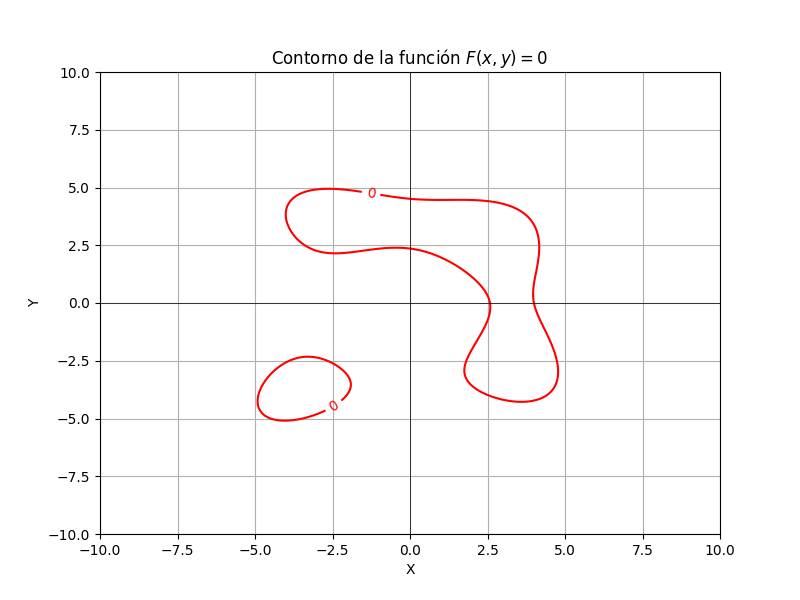

In [3]:
# Crear un rango de valores para x e y de -10 a 10
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

# Crear la malla de puntos (x, y)
X, Y = np.meshgrid(x, y)

# Calcular F en todos los puntos de la malla
Z = F(X, Y)

# Crear la gráfica 
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=[0], colors='red')  # Dibujar el contorno donde F(x, y) = 0
plt.clabel(contour, inline=True, fontsize=10)
plt.title(r"Contorno de la función $F(x, y) = 0$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

Al ver la gráfica podemos ver que un bounding box correcto agregando un ligero margen definiendolo en un cuadrado de $x \in [-6,6]$ y $y \in [-6,6]$

## Estimación de área por Montecarlo

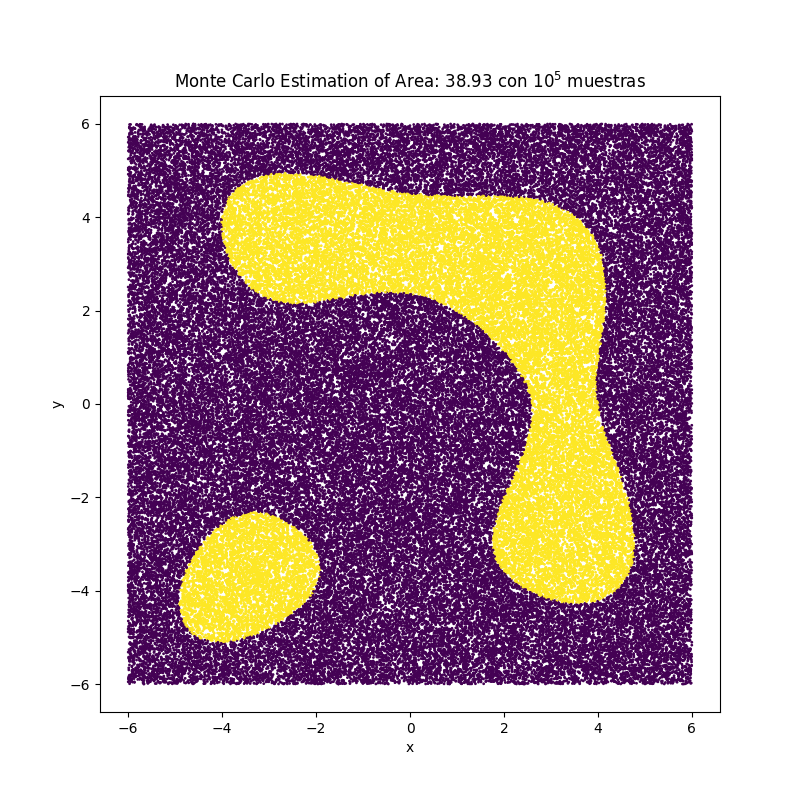

In [5]:
# bounding box
x_min, x_max = -6, 6
y_min, y_max = -6, 6
bounding_box_area = (x_max - x_min) * (y_max - y_min)
# gráfica
num_points = 10**5
# puntos aleatorios
x_random = np.random.uniform(x_min, x_max, num_points)
y_random = np.random.uniform(y_min, y_max, num_points)
F_values = F(x_random, y_random)
# nos quedamos con los valores F(x, y) <= 0
points_inside = F_values <= 0
area_fraction = np.sum(points_inside) / num_points
estimated_area = bounding_box_area * area_fraction
# Visualización de los puntos
plt.figure(figsize=(8, 8))
plt.scatter(x_random, y_random, c=points_inside, s=1)
plt.title(f"Monte Carlo Estimation of Area: {estimated_area:.2f} con $10^5$ muestras")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
# Número de puntos de Monte Carlo
exp = [i for i in range(2,9)]
frames = []
for i in exp:
    num_points = 10**i
    # puntos aleatorios
    x_random = np.random.uniform(x_min, x_max, num_points)
    y_random = np.random.uniform(y_min, y_max, num_points)
    F_values = F(x_random, y_random)
    # nos quedamos con los valores F(x, y) <= 0
    points_inside = F_values <= 0
    # Área estimada
    area_fraction = np.sum(points_inside) / num_points
    estimated_area = bounding_box_area * area_fraction
    # guardar info
    frames.append({"muestras":num_points,"area_estimada":estimated_area})

estimated_area_df = pd.DataFrame(frames)
estimated_area_df.style.format({
    'muestras': '{:.0e}',
    'area_estimada': '{:.2f}'
})

,muestras,area_estimada
0,1e+02,43.20
1,1e+03,41.33
2,1e+04,38.48
3,1e+05,38.57
4,1e+06,38.74
5,1e+07,38.78
6,1e+08,38.78


## Estimación de área con método recursivo


In [6]:
def polygon_area(xlims, ylims):
    b = abs(xlims[1] - xlims[0])
    h = abs(ylims[1] - ylims[0])
    area = b * h
    return area

def plot_implicit(fun,xlims,ylims,maxdepth=4):
    """fun - función implícita
    xlims - límites en x, array [xmin, xmax]
    ylims - límites en y, array [ymin, ymax]
    maxdepth - profundidad máxima de recursión"""
    result = 0
    # cálculo montecarlo
    n = 1000
    x = np.random.uniform(xlims[0], xlims[1], n)
    y = np.random.uniform(ylims[0], ylims[1], n)
    # cálculo de cuadrado
    polyx = np.array([xlims[0], xlims[0], xlims[1], xlims[1], xlims[0]])
    polyy = np.array([ylims[0], ylims[1], ylims[1], ylims[0], ylims[0]])
    corners = np.array([0,0,0,0])
    for i in np.array([0,1]):
        for j in np.array([0,1]):
            corners[2*i+j] = sign(fun(xlims[i],ylims[j]))

    if np.all(np.array(corners) == -1):
        plt.fill( polyx, polyy, color='purple',linewidth=0.5, edgecolor="k")
        result += polygon_area(xlims, ylims)
    elif np.all(np.array(corners) == 1):
        # revisar si tieen parte de la función
        suc = np.sum(fun(x,y) <= 0)
        if suc > 0:
            xmid = (xlims[0]+xlims[1])/2
            ymid = (ylims[0]+ylims[1])/2
            result += plot_implicit(fun,[xlims[0],xmid],[ylims[0],ymid],maxdepth-1)
            result += plot_implicit(fun,[xmid,xlims[1]],[ylims[0],ymid],maxdepth-1)
            result += plot_implicit(fun,[xlims[0],xmid],[ymid,ylims[1]],maxdepth-1)
            result += plot_implicit(fun,[xmid,xlims[1]],[ymid,ylims[1]],maxdepth-1)
        else:
            plt.fill( polyx, polyy,
                linewidth=0.5, edgecolor="k", color='gray',alpha=0.4
            )
    elif maxdepth == 0:
        suc = np.sum(fun(x,y) <= 0)
        plt.fill( polyx, polyy, color='brown',linewidth=0.5, edgecolor="k")
        result += (polygon_area(xlims, ylims) * (suc/n))

    else:
        xmid = (xlims[0]+xlims[1])/2
        ymid = (ylims[0]+ylims[1])/2
        result += plot_implicit(fun,[xlims[0],xmid],[ylims[0],ymid],maxdepth-1)
        result += plot_implicit(fun,[xmid,xlims[1]],[ylims[0],ymid],maxdepth-1)
        result += plot_implicit(fun,[xlims[0],xmid],[ymid,ylims[1]],maxdepth-1)
        result += plot_implicit(fun,[xmid,xlims[1]],[ymid,ylims[1]],maxdepth-1)
    return result
    


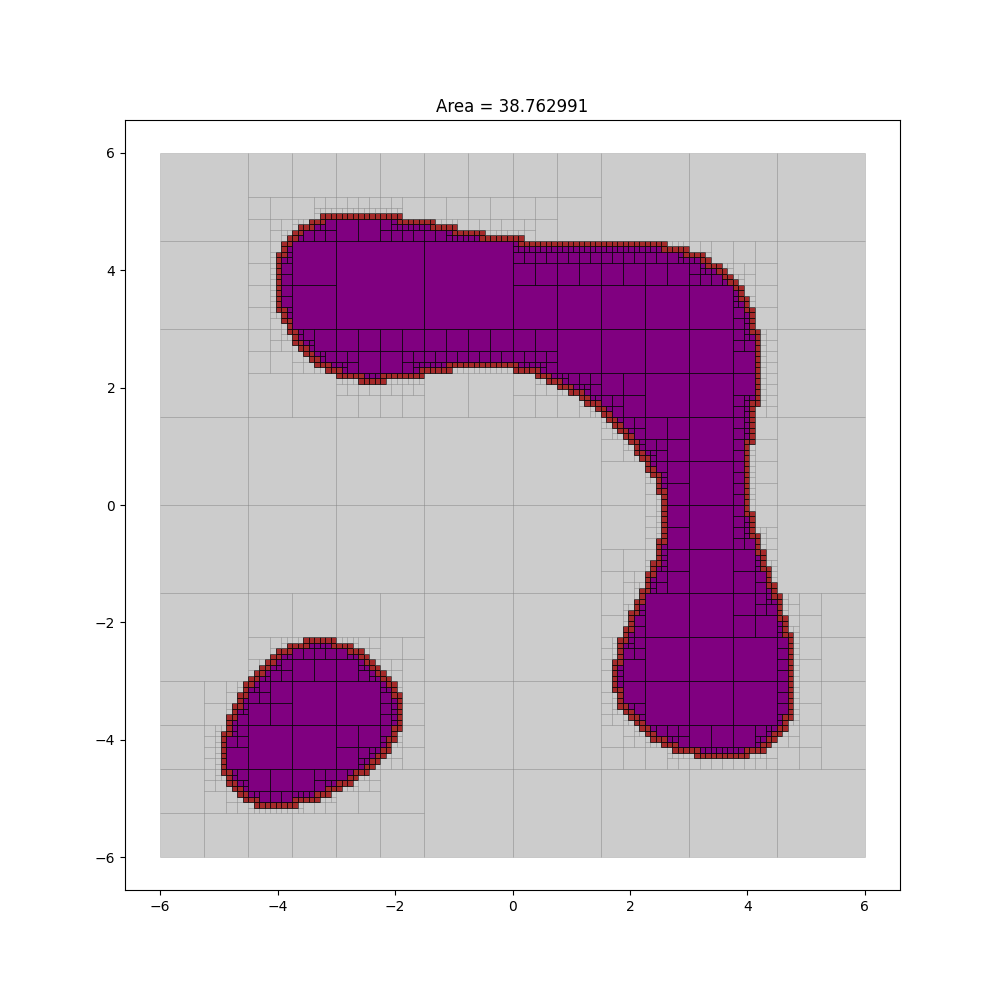

In [7]:
# Si todo es 1 (no es parte de la función) entonces hacer montecarlo para ver si hay algún punto para seccionar
fig = plt.figure( figsize=(10,10) )
result = plot_implicit(F,[-6,6],[-6,6],7)
plt.axis('equal')
plt.title(f"Area = {result:-2f}")
plt.show()

Calcula la probabilidad de que un punto aleatorio $(x,y)$ esté en la región $\mathcal{G}$. 
Las componentes de $(x, y) \in \mathbb{R}^2$ se distribuyen como normal bivariada con medias $\mu_x,\mu_y$, desviaciones estándar $\sigma_x,\sigma_y$, y correlación $p_{xy}$.
$$\mathbb{P}[(x, y) \in \mathcal{G}] =?$$
* (a) Formula la integral para calcular esta probabilidad.
* (b) Explica el uso del método de Monte Carlo en este caso.
* (c) Calcula la probabilidad usando el método de Monte Carlo con $10^2, 10^3, . . . , 10^8$ suponiendo que las componentes de $(x, y) \in \mathbb{R}^2$ se distribuyen como normal bivariada con $\mu_x = \mu_y \in {−6, −5, . . . , 5, 6}$, $\sigma_x = \sigma_y \in {1,2,3,4,5}$ y $p_{xy} = 0$.
* (d) Calcula esta misma probabilidad para $(x,y)$ uniformes en $[−6,6]×[−6,6]$. Haz el cálculo por Monte Carlo y compara con el cálculo usando las áreas obtenidas en las preguntas 1 y 2. 
* (e) Organiza una comparación de todos los resultados anteriores e interpreta.
